# 라이브러리 임포트

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # SVM 분류기를 위한 svc 클래스 임포트
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 데이터 로드

In [3]:
df = pd.read_csv('dataset.csv') # 데이터 셋 로드
df = df.iloc[:, 1:] # 첫 번째 컬럼 index 제외

In [4]:
df.columns # 컬럼 확인

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [5]:
df.info() # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [6]:
# 상위 5개 행 출력
print(df.head())

   having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                          -1              1                   1   
1                           1              1                   1   
2                           1              0                   1   
3                           1              0                   1   
4                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  Favicon  \
0                 -1              -1                           -1        1   
1                  0               1              

# 데이터 분포



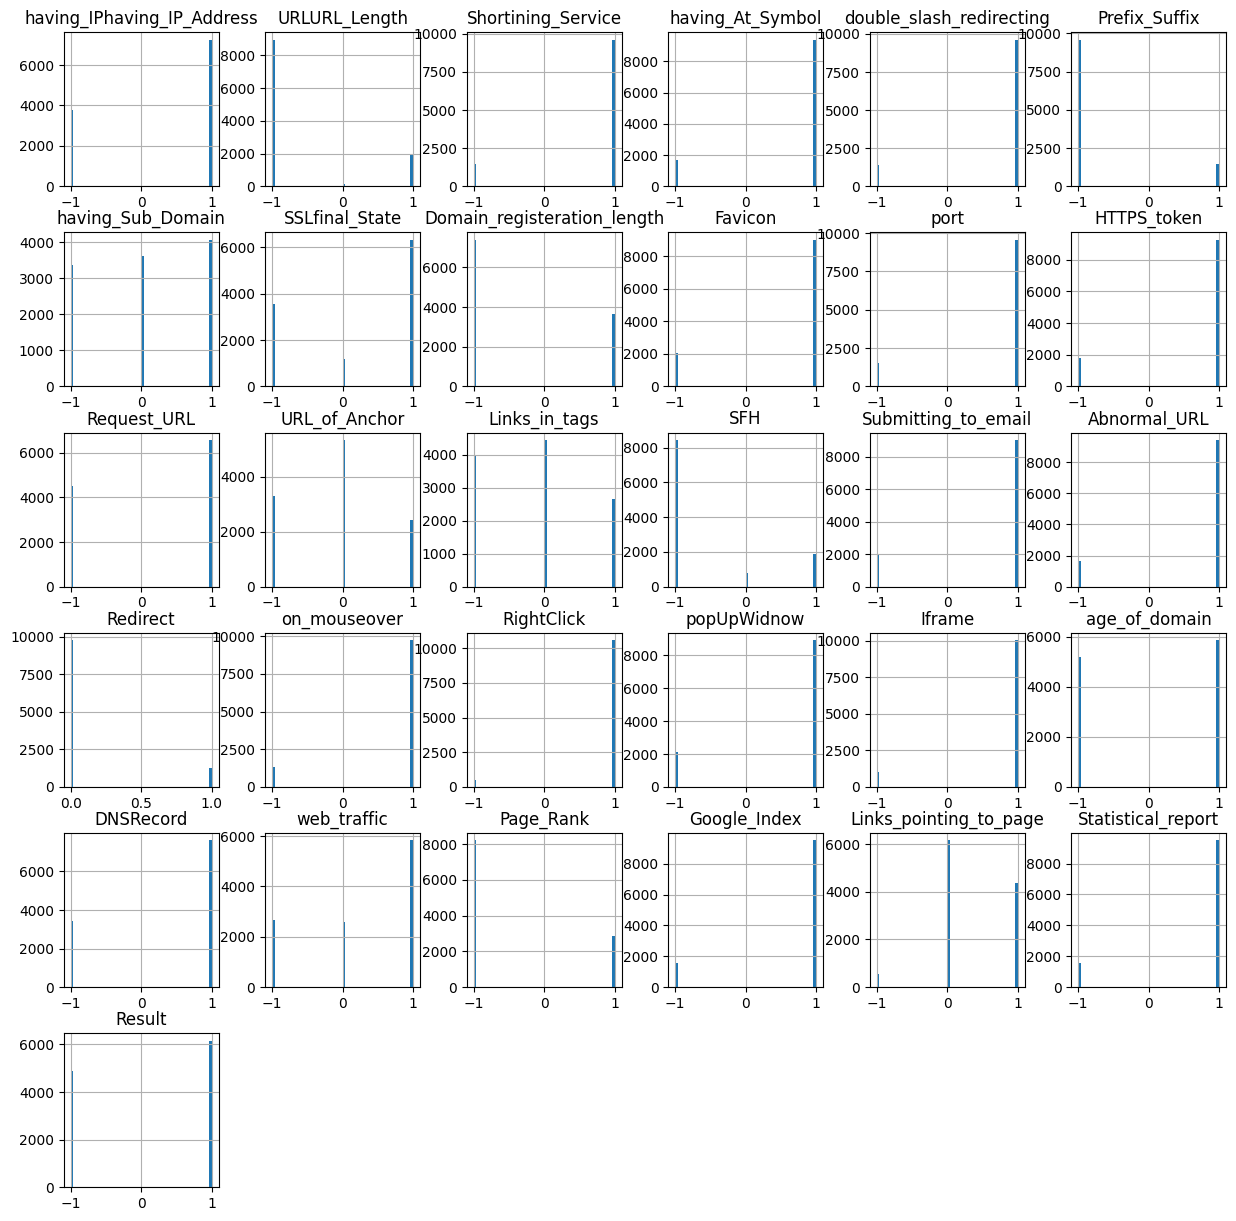

In [7]:
# 데이터 분포 표시
import matplotlib.pyplot as plt

df.hist(bins = 50,figsize = (15,15))

plt.show()

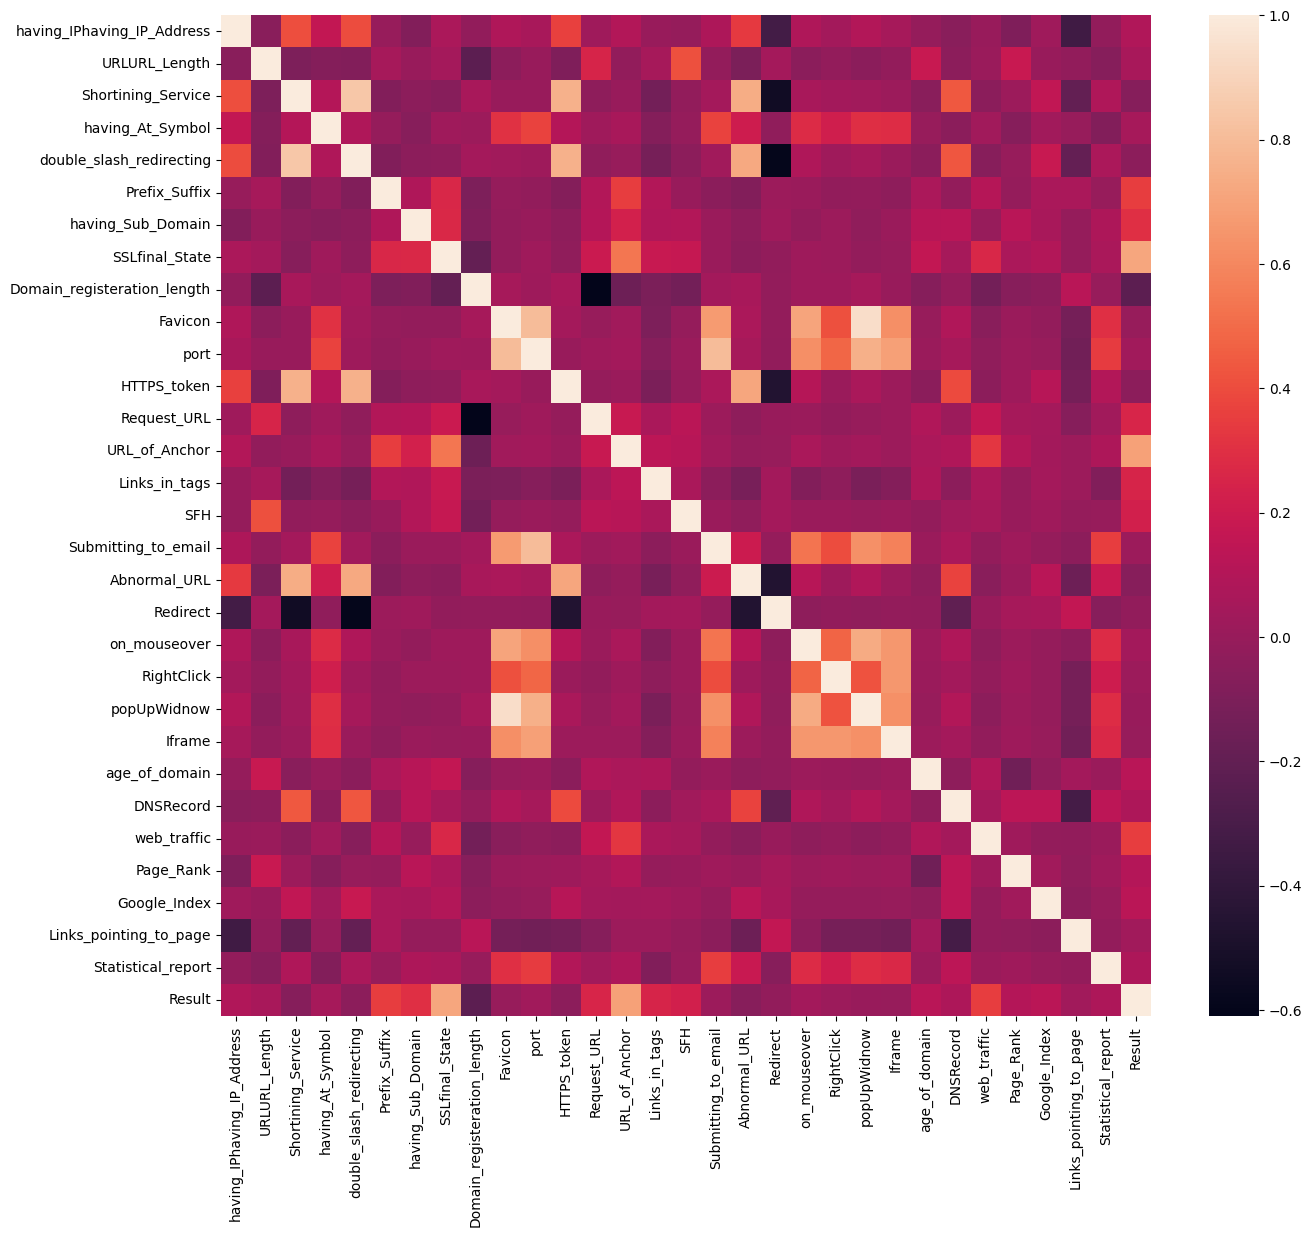

In [8]:
# 히트맵으로 상관관계 시각화
import seaborn as sns

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

# 데이터 분할

In [9]:
# 필요한 컬럼 선택, 마지막 컬럼 Result 제외
X =df.drop(columns=['Result'])

# 타겟 벡터 y (마지막 컬럼 Result)
y = df['Result']

In [10]:
# 데이터를 학습용과 테스트용으로 분할
# 80% 학습용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 인스턴스화

In [12]:
# SVM 모델 인스턴스화
svm = SVC(kernel='linear', C=1.0, random_state=12)

- **kernel='linear'**: 선형 커널을 사용
- **C=1.0**: 규제 파라미터로, 작을수록 규제가 강해지고 과적합을 방지
- **random_state=12**: 난수 시드로, 모델의 재현성을 보장

# 모델 학습

In [13]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

# 예측

In [14]:
# 학습 데이터에 대한 예측 수행
y_train_pred = svm.predict(X_train)

# 테스트 데이터에 대한 예측 수행
y_test_pred = svm.predict(X_test)

# 분류 보고서 출력

In [15]:
# 학습 데이터에 대한 정확도 및 분류 보고서
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

In [16]:
# 테스트 데이터에 대한 정확도 및 분류 보고서
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

In [17]:
print(f'훈련 정확도: {train_accuracy:.4f}')
print(f'테스트 정확도: {test_accuracy:.4f}')
print('훈련 분류 보고서:')
print(train_report)
print('테스트 분류 보고서:')
print(test_report)

훈련 정확도: 0.9284
테스트 정확도: 0.9285
훈련 분류 보고서:
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3942
           1       0.93      0.95      0.94      4902

    accuracy                           0.93      8844
   macro avg       0.93      0.93      0.93      8844
weighted avg       0.93      0.93      0.93      8844

테스트 분류 보고서:
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       956
           1       0.93      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



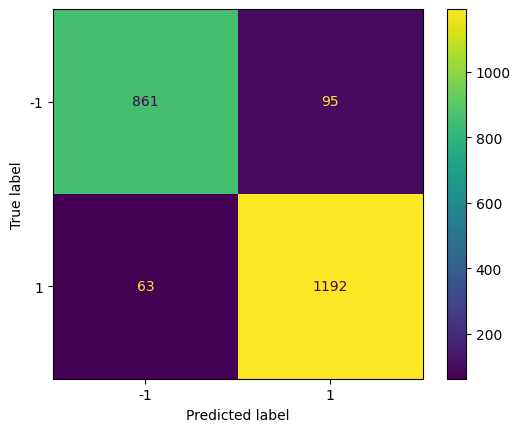

In [18]:
# 테스트 데이터에 대한 혼동 행렬 계산
cm = confusion_matrix(y_test, y_test_pred, labels=svm.classes_)

# ConfusionMatrixDisplay 객체 생성
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

# 혼동 행렬 플롯
disp.plot()

# 플롯을 화면에 표시
plt.show()

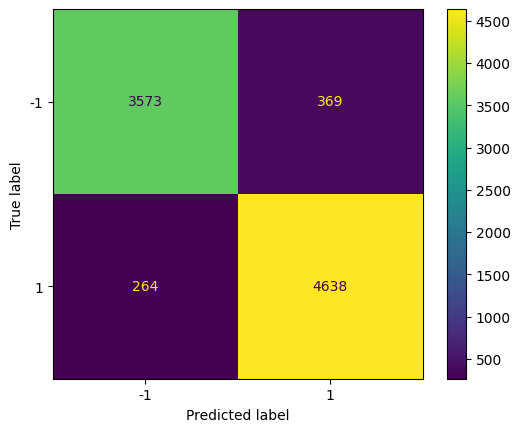

In [19]:
# 훈련 데이터에 대한 혼동 행렬 계산
cm = confusion_matrix(y_train, y_train_pred, labels=svm.classes_)

# ConfusionMatrixDisplay 객체 생성
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

# 혼동 행렬 플롯
disp.plot()

# 플롯을 화면에 표시
plt.show()

# 교차 검증 K-Fold Cross-Validation

In [20]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행.
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# svm 모델에 대해 exec_kfold 호출
exec_kfold(svm, folds=5)

교차 검증 0 정확도: 0.9254
교차 검증 1 정확도: 0.9313
교차 검증 2 정확도: 0.9294
교차 검증 3 정확도: 0.9195
교차 검증 4 정확도: 0.9254
평균 정확도: 0.9262


# 하이퍼파라미터 튜닝 GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
parameters = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.001, 0.01, 0.1, 1]}

# GridSearchCV 설정 및 모델 학습
grid_svm = GridSearchCV(svm, param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=5)
grid_svm.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 최고 정확도 출력
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_svm.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_svm.best_score_))

# 최적 모델 할당 및 예측
best_svm = grid_svm.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 SVC 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
GridSearchCV 최고 정확도: 0.9669
테스트 세트에서의 SVC 정확도 : 0.9661
